# EDA

In [1]:
import os
import os.path as osp
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from collections import Counter
from tqdm import tqdm


## dataset number

In [2]:
dataset_path = '/media/alex/80CA308ECA308288/alex_dataset/ecological-assets'
train_dataset_path = os.path.join(dataset_path, 'suichang_round1_train_210120')
test_dataset_path = os.path.join(dataset_path, 'suichang_round1_test_partA_210120')

train_image = glob.glob(osp.join(train_dataset_path, '*.tif'))
train_mask = glob.glob(osp.join(train_dataset_path, '*.png'))

test_image = glob.glob(osp.join(test_dataset_path, '*.tif'))

assert len(train_image) == len(train_mask)

print('number of train sample: {}'.format(len(train_image)))
print('number of test sample: {}'.format(len(test_image)))

number of train sample: 16017
number of test sample: 3000


In [3]:
label_cat = {1: "耕地", 2: "林地", 3: "草地", 4: "道路", 5: "城镇建设用地", 6: "农村建设用地", 7: "工业用地", 8: "构筑物", 9: "水域", 10: "裸地"}

class_name = ['farm_land', 'forest', 'grass', 'road', 'urban_area', 'countryside', 'industrial_land', 'construction', 'water', 'bareland']

cat_label = {name:index+1 for index, name in enumerate(class_name)}
label_cat = {index+1:name for index, name in enumerate(class_name)}

cat_label
label_cat

{1: 'farm_land',
 2: 'forest',
 3: 'grass',
 4: 'road',
 5: 'urban_area',
 6: 'countryside',
 7: 'industrial_land',
 8: 'construction',
 9: 'water',
 10: 'bareland'}

## visual mask

In [4]:
# define label palette
def get_palette():
    """

    :return:
    """
    palette=[]
    for i in range(256):
        palette.extend((i,i,i))

    color_array = np.array([[0, 0, 0],  # other
                            [177, 191, 122],  # farm_land
                            [0, 128, 0],  # forest
                            [128, 168, 93],  # grass
                            [62, 51, 0],  # road
                            [128, 128, 0],  # urban_area
                            [128, 128, 128],  # countryside
                            [192, 128, 0],  # industrial_land
                            [0, 128, 128],  # construction
                            [132, 200, 173],  # water
                            [128, 64, 0]],  # bareland
                           dtype='uint8')

    palette[:3*11]=color_array.flatten()

    return palette

In [5]:
def show_palette(palette, cat_label:dict):
    """

    :param palette:
    :param cat_label:
    :return:
    """
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4),
                            subplot_kw={'xticks': [], 'yticks': []})

    for cat, label in cat_label.items():

        cat_palette = np.ones((4, 6, 3), dtype=np.int32) * np.array([palette[label*3: (label+1)*3]])

        axs.flat[label-1].imshow(cat_palette)
        axs.flat[label-1].set_title(cat, size=14)

    plt.show()

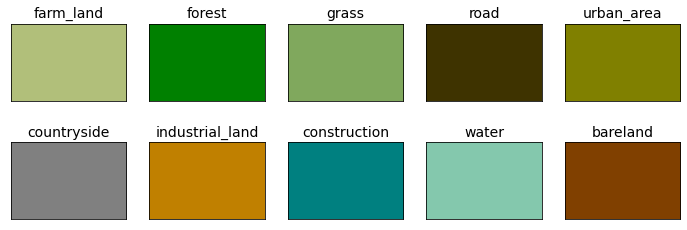

In [6]:
palette = get_palette()
show_palette(palette, cat_label)

In [7]:
# get rgb image
def convert_img_mode(img_path):
    """

    :param img_path:
    :return:
    """
    raw_img = Image.open(img_path) # RGBA
    rgb_img = raw_img.convert(mode='RGB') # RGB

    return rgb_img


In [8]:
# visual mask 
def visual_mask(mask_path, palette):
    """

    :param mask_path:
    :param palette:
    :return:
    """
    mask_img = Image.open(mask_path)
    mask_img.putpalette(palette)

    return mask_img

In [9]:
def visual_dataset(image_dataset, mask_dataset, palette, num_row=2, num_col=6):
    """

    :param image_dataset:
    :param mask_dataset:
    :param platte:
    :param num_row:
    :param num_col:
    :return:
    """
    img_data = image_dataset[: num_col]
    mask_data = mask_dataset[: num_col]
    fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(16, 6),
                            subplot_kw={'xticks': [], 'yticks': []})

    for index, (img_path, mask_path) in enumerate(zip(img_data, mask_data)):

        rgb_img = convert_img_mode(img_path)
        mask_img = visual_mask(mask_path, palette)

        img_name = os.path.basename(img_path).split('.')[0]
        axs.flat[index].imshow(rgb_img)
        axs.flat[index].set_title(img_name, size=15)
        axs.flat[index + num_col].imshow(mask_img)

    plt.show()

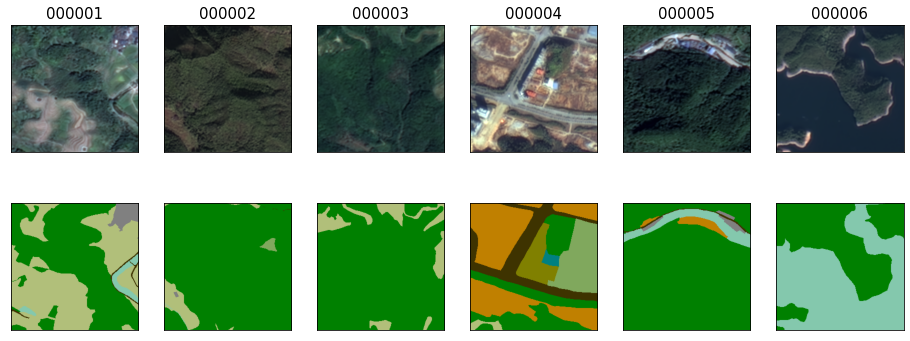

In [10]:
visual_dataset(train_image, train_mask, palette)

## count label

In [11]:
def get_label_number(mask_dataset):

    label_count = Counter()

    for mask_path in tqdm(mask_dataset):
        mask_img = Image.open(mask_path)
        label_count.update(np.array(mask_img).flatten())

    return label_count

In [12]:
label_count = get_label_number(train_mask)
label_count

100%|██████████| 16017/16017 [02:19<00:00, 115.06it/s]


Counter({2: 783364798,
         1: 173067508,
         6: 19350932,
         4: 17751239,
         9: 35714475,
         3: 6086055,
         7: 4600435,
         5: 5458338,
         8: 3419876,
         10: 876456})

                         0
forest           783364798
farm_land        173067508
countryside       19350932
road              17751239
water             35714475
grass              6086055
industrial_land    4600435
urban_area         5458338
construction       3419876
bareland            876456


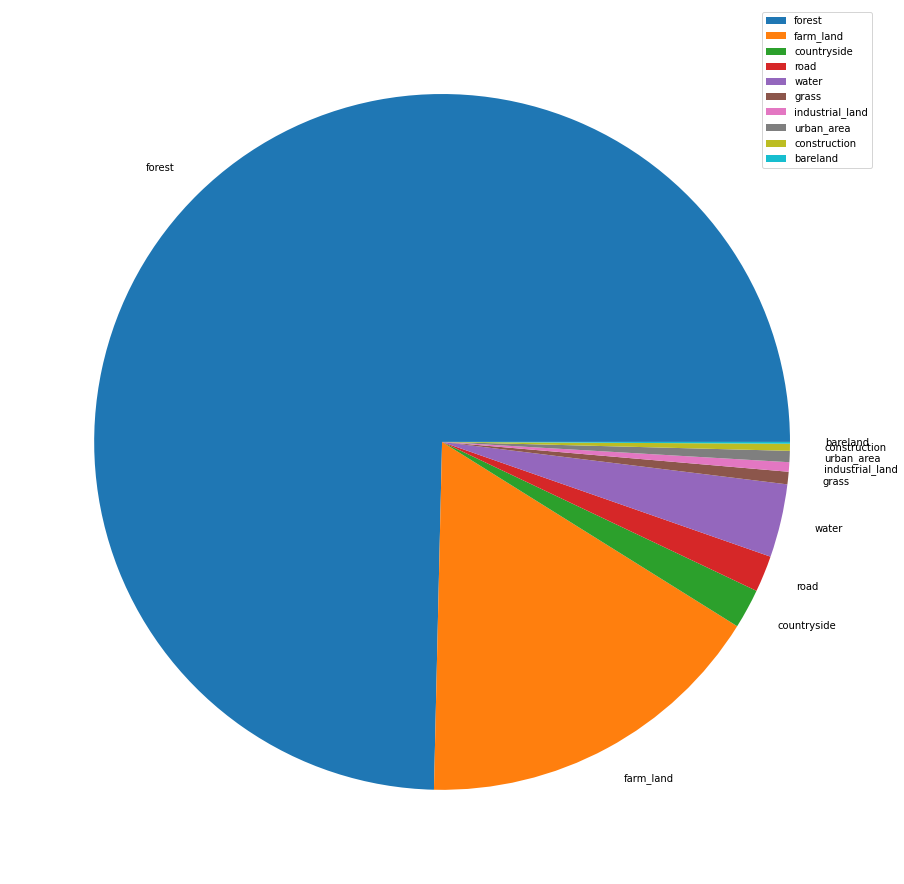

In [13]:
cat_count = {label_cat[label]: value for label, value in label_count.items()}
plt.style.use({'figure.figsize': (16, 16)})
indices = cat_count.keys()
values = cat_count.values()
count_df = pd.DataFrame(list(values), index=indices)
print(count_df)
count_df.iloc[:, 0].plot.pie()
plt.legend()
plt.axis('off')
plt.show()
